In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Rutuja Salunke\Downloads\iris.csv")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

# Feature Engineering

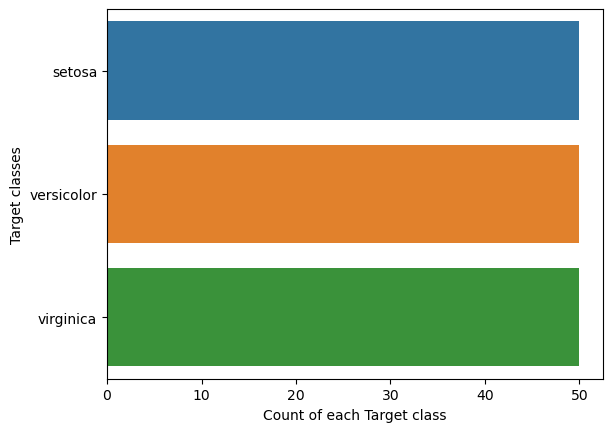

In [6]:
sns.countplot(y=df.Species ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [7]:
df["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Species"] = le.fit_transform(df["Species"])



In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

lower_tail = Q1- 1.5 * IQR
upper_tail = Q3+ 1.5 * IQR

outliers = (df < lower_tail) | (df > upper_tail)
outliers_count = outliers.sum()
outliers_count

Sepal.Length    0
Sepal.Width     4
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [10]:
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = df.columns
Finding_outliar1(df,columns)

3.1499999999999986
8.350000000000001
2.05
4.05
-3.649999999999999
10.349999999999998
-1.95
4.05
-3.0
5.0


In [11]:
Std = StandardScaler()
Standard_array = Std.fit_transform(df)
Df_Std = pd.DataFrame(Standard_array, columns = df.columns)
Df_Std.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.051961,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.127367,-1.340227,-1.315444,-1.224745
2,-1.385353,0.344364,-1.397064,-1.315444,-1.224745
3,-1.506521,0.108498,-1.283389,-1.315444,-1.224745
4,-1.021849,1.287827,-1.340227,-1.315444,-1.224745


# Feature Selection

In [12]:
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,1.000000,-0.118719,0.871754,0.817941,0.782561
Sepal.Width,-0.118719,1.000000,-0.427873,-0.365317,-0.426572
Petal.Length,0.871754,-0.427873,1.000000,0.962865,0.949035
Petal.Width,0.817941,-0.365317,0.962865,1.000000,0.956547
Species,0.782561,-0.426572,0.949035,0.956547,1.000000


## Linearity

<Axes: >

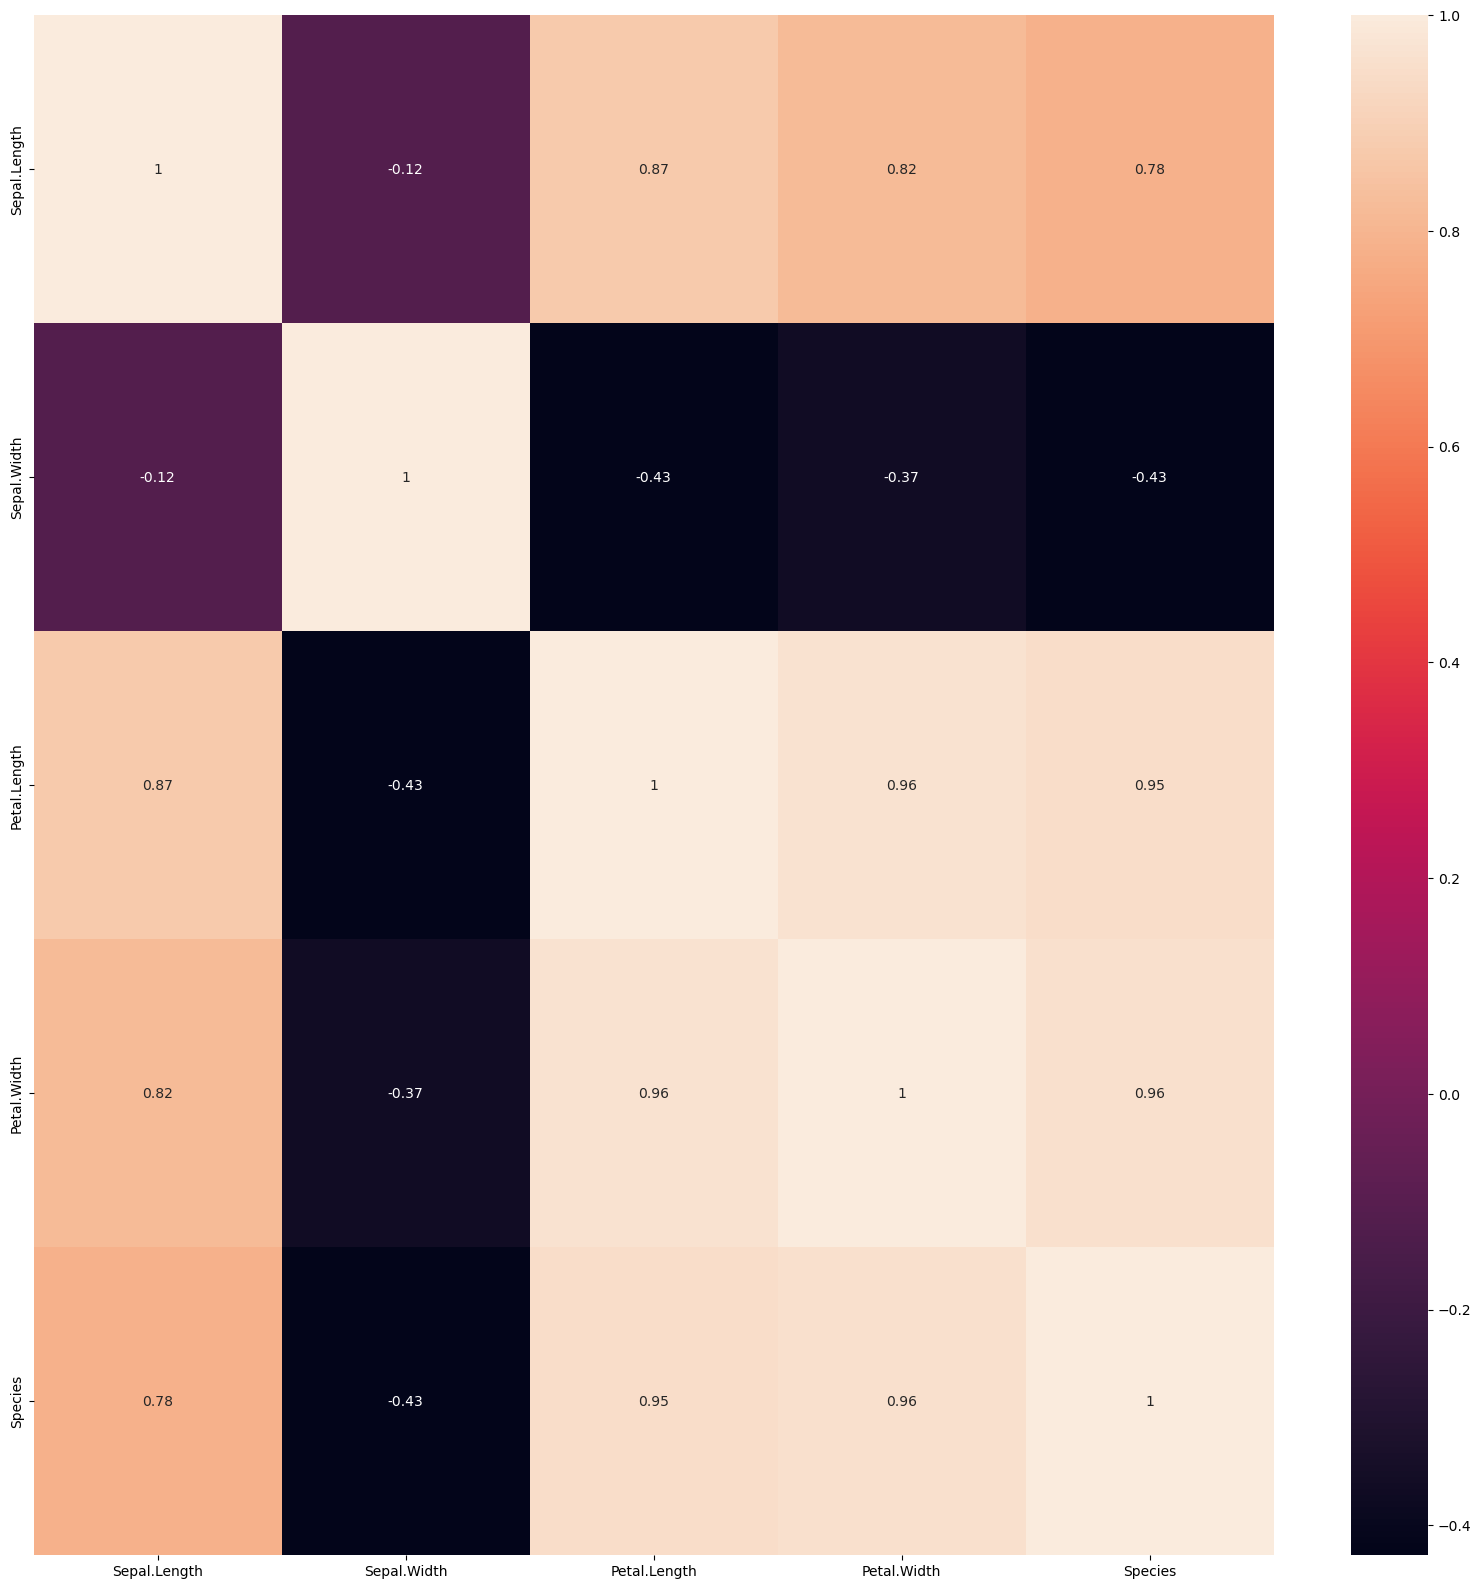

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)


# Model Training

In [14]:
x=df.iloc[:,0:4]
x
y=df["Species"]

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=5)

In [16]:
log_reg=LogisticRegression(multi_class="ovr")
log_reg

LogisticRegression(multi_class='ovr')

In [17]:
log_reg_model=log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression(multi_class='ovr')

In [18]:
ytrain_predict=log_reg_model.predict(xtrain)

In [19]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,ytrain_predict)
print(class_report)
print()

Accuracy : 0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.85      0.89        34
           2       0.87      0.94      0.91        36

    accuracy                           0.93       105
   macro avg       0.94      0.93      0.93       105
weighted avg       0.94      0.93      0.93       105




# Model Evaluation

In [20]:
#Testing
ytest_predict = log_reg_model.predict(xtest)
ytest_predict

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1], dtype=int64)

In [21]:
accuracy = accuracy_score(ytest,ytest_predict)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,ytest_predict))
print()

Accuracy : 0.9777777777777777

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45




# Decision Tree

In [22]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [23]:
dt_model=dt.fit(xtrain,ytrain)
dt_model

DecisionTreeClassifier()

In [24]:
ytrain_pred1=dt_model.predict(xtrain)

In [25]:
accuracy = accuracy_score(ytrain,ytrain_pred1)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,ytrain_pred1)
print(class_report)
print()

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105




In [26]:
#Testing
y_pred_test1 = dt_model.predict(xtest)
y_pred_test1

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1], dtype=int64)

In [27]:
accuracy = accuracy_score(ytest,y_pred_test1)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,y_pred_test1))
print()

Accuracy : 0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.88      0.90        16
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45




In [28]:
hyperparameters={
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,10),
    "min_samples_leaf" : np.arange(2,10),
} 

In [29]:
random_search_model  = RandomizedSearchCV(dt_model,hyperparameters,error_score='raise',cv=5)
random_search_model

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [30]:
random_search_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [31]:
random_search_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=6,
                       min_samples_split=4)

In [32]:
hyp_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=7,
                       min_samples_split=4)

In [33]:
hyp_dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=7,
                       min_samples_split=4)

In [34]:
yt_predict=hyp_dt_model.predict(xtrain)
yt_predict

array([2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0,
       1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1], dtype=int64)

In [35]:
accuracy = accuracy_score(ytrain,yt_predict)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,yt_predict)
print(class_report)
print()

Accuracy : 0.9714285714285714

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      1.00      0.96        34
           2       1.00      0.92      0.96        36

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105




In [36]:
ytest_predict1 = hyp_dt_model.predict(xtest)

In [37]:
accuracy = accuracy_score(ytest,ytest_predict1)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,ytest_predict1))
print()

Accuracy : 0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45




# Random Forest

In [38]:
Random_model=RandomForestClassifier()
Random_model

RandomForestClassifier()

In [39]:
Random_model_reg=Random_model.fit(xtrain,ytrain)
Random_model_reg

RandomForestClassifier()

In [40]:
y_pred=Random_model_reg.predict(xtrain)
y_pred

array([2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2,
       0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0,
       2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1], dtype=int64)

In [41]:
accuracy = accuracy_score(ytrain,y_pred)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,y_pred)
print(class_report)
print()

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105




In [42]:
y_test_predict = Random_model_reg.predict(xtest)

In [43]:
accuracy = accuracy_score(ytest,y_test_predict)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,y_test_predict))
print()

Accuracy : 0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45




In [44]:
hyperparameters=hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,10),
    "min_samples_leaf" : np.arange(2,10),
    "max_features" : np.arange(2,10),
    
} 

In [45]:
random_search_model1  = RandomizedSearchCV(Random_model_reg,hyperparameters,error_score='raise',cv=5)
random_search_model1

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [46]:
random_search_model1.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [47]:
random_search_model1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=1, max_features=9,
                       min_samples_leaf=8, min_samples_split=7)

In [48]:
hyp_dt_model1 = RandomForestClassifier(max_depth=9, max_features=7, min_samples_leaf=3,
                       min_samples_split=9)

In [49]:
hyp_dt_model1.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=9, max_features=7, min_samples_leaf=3,
                       min_samples_split=9)

In [50]:
yt_predict1=hyp_dt_model1.predict(xtrain)
yt_predict

array([2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0,
       1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1], dtype=int64)

In [51]:
accuracy = accuracy_score(ytrain,y_pred)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,y_pred)
print(class_report)
print()

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105




In [52]:
y_test_predict1 = hyp_dt_model1.predict(xtest)

In [53]:
accuracy = accuracy_score(ytest,y_test_predict)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,y_test_predict))
print()

Accuracy : 0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45




# KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn=KNeighborsClassifier(n_neighbors=10)
knn

KNeighborsClassifier(n_neighbors=10)

In [77]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [81]:
ypredtrain=knn.predict(xtrain)

In [82]:
mat=confusion_matrix(ytrain,ypredtrain)
print(mat)

[[35  0  0]
 [ 0 32  2]
 [ 0  3 33]]


In [83]:
score=accuracy_score(ytrain,ypredtrain)
score

0.9523809523809523

In [78]:
ypred=knn.predict(xtest)
ypred

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0,
       1], dtype=int64)

In [79]:
mat=confusion_matrix(ytest,ypred)
print(mat)

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [80]:
score=accuracy_score(ytest,ypred)
score

0.9333333333333333